In [11]:
import numpy as np
import xlrd

In [160]:
d = xlrd.open_workbook("./Data/Excel/CH14/ex14-5.xlsx","r").sheet_by_index(0)

In [164]:
d.col_values(0)

['Worker',
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [22]:
d = xlrd.open_workbook("./Data/Excel/CH11/ex11-8.xlsx","r").sheet_by_index(0)
no_item = np.array(d.col_values(0)[1:])
time = np.array(d.col_values(1)[1:])

In [90]:
l = no_item.size

In [23]:
# 1.a

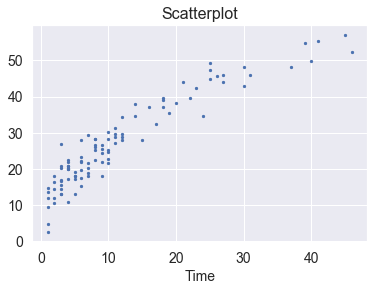

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [157]:
import matplotlib.pyplot as plt
plt.scatter(no_item,time,s=5)
plt.title("Scatterplot", fontsize=16)
plt.xlabel("NoItem", fontsize=14)
plt.xlabel("Time", fontsize=14)

plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()

In [35]:
# 1.b

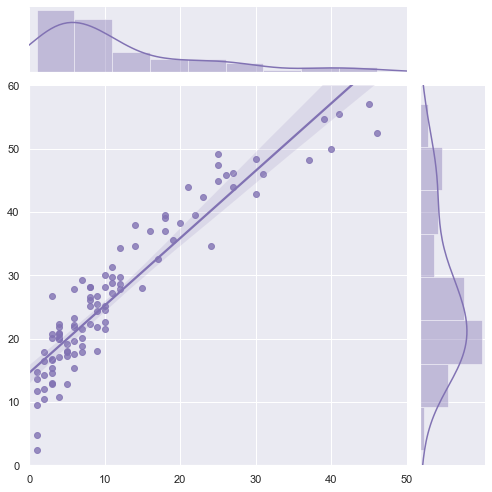

In [159]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot(no_item, time,
                  kind="reg", truncate=False,
                  xlim=(0, 50), ylim=(0, 60),
                  color="m", height=7)

g.savefig("output.png")

看上去拟合的挺好的，但是我们还是尽可能量化一下，考虑 $\sigma_{\hat{\beta_0}}$ & $\sigma_{\hat{\beta_1}}$ & $\rho_{\hat{\beta_0},\hat{\beta_1}}$ 是一个很好的衡量

In [89]:
# 使用条件为：首先看看 epsilon 是否符合正态分布，即 \hat{epsilon} = yi - beta_0 x_i - beta_1 ~ N(0, sigma^2)

In [91]:
l_xx = np.sum(no_item**2) - l * (np.mean(no_item))**2
l_xy = np.sum(no_item * time) - l * np.mean(no_item) * np.mean(time)

In [92]:
hat_beta_1 = l_xy / l_xx
hat_beta_0 = np.mean(time) - hat_beta_1 * np.mean(no_item)
print(hat_beta_1, hat_beta_0)

1.0650466942991221 14.585099474213354


In [51]:
epsilon = time - hat_beta_1 * no_item - hat_beta_0

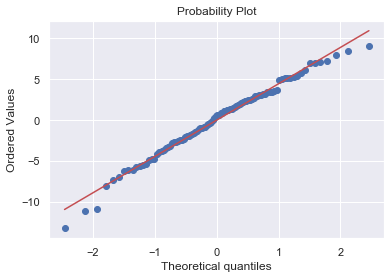

In [75]:
import pylab
from scipy import stats
stats.probplot(epsilon, dist="norm", plot=pylab) # qq-plot
pylab.show()


In [58]:
epsilon.size # 大于 50， 所以不适用 shapiro 检验；同时小于 300， 所以不适用 k-s 检验

100

In [76]:
print(stats.shapiro(epsilon)) # shapiro 检验 仅供参考
print(stats.kstest(epsilon, 'norm')) # k-s 检验 仅供参考

from statsmodels.stats.diagnostic import lilliefors
print(lilliefors(epsilon)) # lilliefors 检验

(0.9856665730476379, 0.35435059666633606)
KstestResult(statistic=0.34109187581345013, pvalue=6.892890630494646e-11)
(0.05941434540776569, 0.5199039500141647)


/Users/wushuang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [105]:
# 以此来看 epsilon 可以看作来自正态分布，于是我们可以认定 beta 也符合正态分布
hat_sigma_squared = 1/(l - 2) * \
    np.sum((time - (hat_beta_0 + hat_beta_1 * no_item))**2)
sigma_hat_beta_1 = hat_sigma_squared / l_xx
sigma_hat_beta_0 = hat_sigma_squared * (1 / l + (np.mean(no_item))**2 / l_xx)
cov_beta = - np.mean(no_item) / l_xx * hat_sigma_squared

In [118]:
print(hat_sigma_squared, sigma_hat_beta_1 / hat_sigma_squared, sigma_hat_beta_0 / hat_sigma_squared, cov_beta / hat_sigma_squared) # 至少小上一个数量级

19.61157559011824 8.749985781273104e-05 0.022162838985386648 -0.001031623323612099


In [111]:
s_t = np.sum((time - np.mean(time))**2)
s_r = np.sum((time - (hat_beta_0 + hat_beta_1 * no_item))**2)
s_squared = 1 - s_r / s_t

In [113]:
print(s_squared)

0.8708868842211651


In [95]:
no_item_sqrt = np.sqrt(no_item)

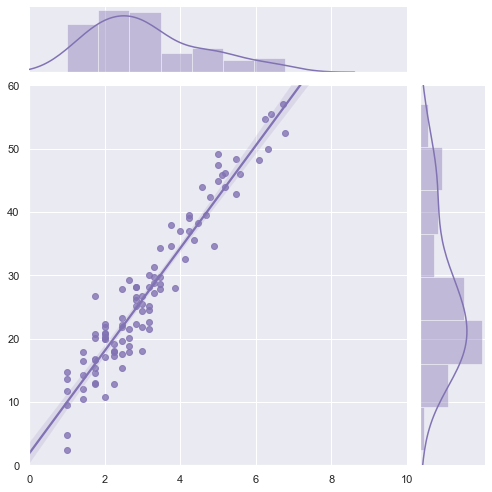

In [96]:
g = sns.jointplot(no_item_sqrt, time,
                  kind="reg", truncate=False,
                  xlim=(0, 10), ylim=(0, 60),
                  color="m", height=7)

In [97]:
l_xx_new = np.sum(no_item_sqrt**2) - l * (np.mean(no_item_sqrt))**2
l_xy_new = np.sum(no_item_sqrt * time) - l * np.mean(no_item_sqrt) * np.mean(time)

In [98]:
hat_beta_1_new = l_xy_new / l_xx_new
hat_beta_0_new = np.mean(time) - hat_beta_1_new * np.mean(no_item_sqrt)
print(hat_beta_1_new, hat_beta_0_new)

8.111158574049872 1.8475254766631402


In [99]:
epsilon_new = time - hat_beta_1_new * no_item_sqrt - hat_beta_0_new

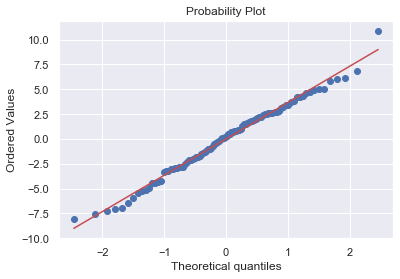

In [101]:
stats.probplot(epsilon_new, dist="norm", plot=pylab) # qq-plot
pylab.show()

In [102]:
print(stats.shapiro(epsilon_new)) # shapiro 检验 仅供参考
print(stats.kstest(epsilon_new, 'norm')) # k-s 检验 仅供参考

print(lilliefors(epsilon_new)) # lilliefors 检验

(0.9894731044769287, 0.6221455931663513)
KstestResult(statistic=0.32113198278859956, pvalue=1.125763092149831e-09)
(0.048994085333213144, 0.8035402910696953)


/Users/wushuang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [107]:
# 以此来看 epsilon 可以看作来自正态分布，于是我们可以认定 beta 也符合正态分布
hat_sigma_squared_new = 1/(l - 2) * \
    np.sum((time - (hat_beta_0_new + hat_beta_1_new * no_item_sqrt))**2)
sigma_hat_beta_1_new = hat_sigma_squared_new / l_xx_new
sigma_hat_beta_0_new = hat_sigma_squared_new * (1 / l + (np.mean(no_item_sqrt))**2 / l_xx_new)
cov_beta_new = - np.mean(no_item_sqrt) / l_xx_new * hat_sigma_squared_new

In [117]:
print(hat_sigma_squared_new, sigma_hat_beta_1_new / hat_sigma_squared_new, sigma_hat_beta_0_new / hat_sigma_squared_new, cov_beta_new / hat_sigma_squared_new) # 至少小上一个数量级

13.25759598770915 0.0048424012595084075 0.05709191084960413 -0.015100924753497075


In [115]:
s_t_new = np.sum((time - np.mean(time))**2)
s_r_new = np.sum((time - (hat_beta_0_new + hat_beta_1_new * no_item_sqrt))**2)
s_squared_new = 1 - s_r_new / s_t_new

In [116]:
print(s_squared_new)

0.9127184086844811


In [119]:
# 1.c

In [122]:
# 由 s**2 得出后者更好，从sigma hat beta看前者更精确，这应该是两个fit的关注点不一样造成的。

In [123]:
# 1.d

In [124]:
test_time = hat_beta_1 * 13 + hat_beta_0

In [125]:
test_time_new = hat_beta_1_new * np.sqrt(13) + hat_beta_0_new

In [126]:
print(test_time, test_time_new)

28.43070650010194 31.092723618819328


In [129]:
np.sqrt(hat_sigma_squared) # > delta, 所以可以看作没有太大差别

4.428495860912398

In [130]:
# 2.a

In [139]:
# > 30 , z dis
stats.norm.interval(0.95, loc=hat_beta_1, scale=np.sqrt(sigma_hat_beta_1))

(0.9838556723731327, 1.1462377162251116)

In [140]:
# 2.b
# 随着物品数量的增加，组装装运所需的平均时间没有变化。

In [141]:
# 2.c
# 更自然的替代假设: 随着物品数量的增加，组装运输所需的平均时间发生了一些显著的变化
# H_a: \beta_1 \neq 0

In [150]:
p_values = scipy.stats.norm.sf(abs((0 - hat_beta_1)/np.sqrt(sigma_hat_beta_1)))*2

In [151]:
p_values # ~~ 0 , 因此，有充分证据可以得出结论不等于零。

8.944600299694533e-146

In [152]:
# 3.a
stats.norm.interval(0.95, loc=hat_beta_0, scale=np.sqrt(sigma_hat_beta_0))

(13.292937281892751, 15.877261666533958)

In [153]:
# 3.b 如果“项目数”为零，则平均所需时间为零。

In [154]:
p_values = scipy.stats.norm.sf(abs((0 - hat_beta_0)/np.sqrt(sigma_hat_beta_0)))*2

In [156]:
p_values # 0.00 , 因此，有充分证据可以得出结论不等于零。

1.906380734479042e-108